This notebook shows how to:

1). Create a very simple simulated photon counts map for a Fermi-LAT ROI, with a Gaussian shaped source at the center.

2). Create a TS map of said ROI;

3). How to stack the TS maps to verify the existence of such souce population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

First step is to construct a 71pix by 71pix map, 0.1deg/pixel.

This creates a map of a 7.1deg by 7.1deg region.

It contains a source with 0.5 FWHM, and the peak is at the center of the map. 

In [2]:
x, y = np.meshgrid(np.linspace(-35,35,71), np.linspace(-35,35,71))
dst = np.sqrt(x*x+y*y)

# Intializing sigma and muu
sigma = 5
muu = 0.000

# Calculating normalized 2D Gaussian array, to be used as the base for the following calculations. 
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )

In our Regions of interest (ROIs), the background photon counts level is at flat_field = 20/pixel. 
Hence, for the noisy pixels, their photon counts are drawn from a Poisson distribution for each pixel. 

The signal strength of the source is defined by a signal-to-noise ratio between the peak of the Gaussian, and the noise/background level. 

To construct the data, the source is added on top of the noise/background level

In [3]:
flat_field = 20. ###Average background/noise photon counts level.
snr = 0.5   ###signal to noise ratio

model= gauss * flat_field * snr + flat_field #Theoretical photon count in each pixel. 

##This below is how to construct a simulated observations. 
roi=np.zeros(gauss.shape)
for i in range(71):
    for j in range(71):
        roi[i,j]=np.random.poisson(flat_field)*gauss[i,j]* snr +np.random.poisson(flat_field) 

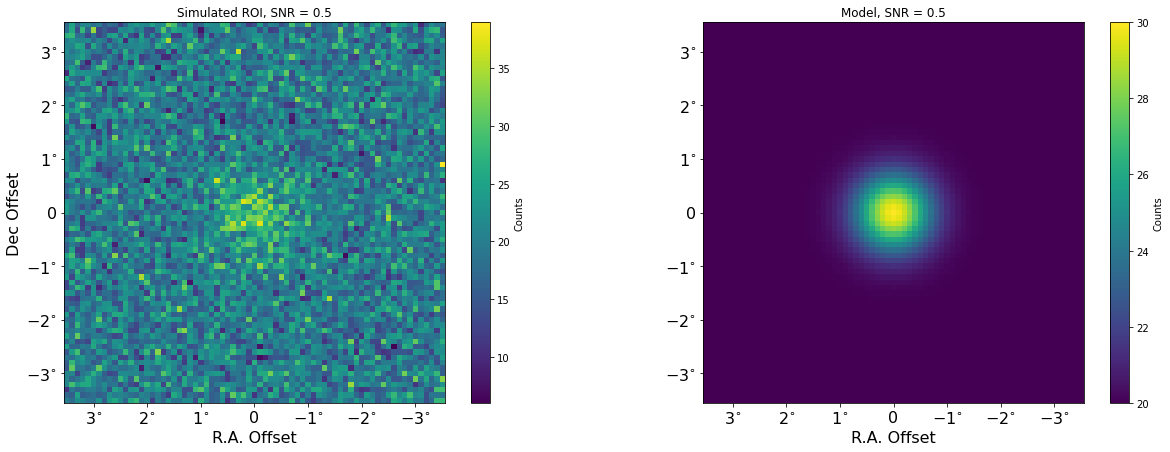

In [4]:
fig5,axs5=plt.subplots(ncols=2,nrows=1,figsize=(21,7))


im=axs5[0].imshow(roi)
axs5[0].set_title('Simulated ROI, SNR = '+str(snr))
axs5[0].set_ylabel(r'Dec Offset',fontsize=16)
axs5[0].set_yticks([5,15,25,35,45,55,65])
axs5[0].set_yticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
axs5[0].set_xlabel(r'R.A. Offset',fontsize=16)
axs5[0].set_xticks([5,15,25,35,45,55,65])
axs5[0].set_xticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
fig5.colorbar(im,ax=axs5[0], label='Counts')
im=axs5[1].imshow(model)
axs5[1].set_title('Model, SNR = '+str(snr))
#axs5[1].set_ylabel(r'Dec Offset',fontsize=16)
axs5[1].set_yticks([5,15,25,35,45,55,65])
axs5[1].set_yticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
axs5[1].set_xlabel(r'R.A. Offset',fontsize=16)
axs5[1].set_xticks([5,15,25,35,45,55,65])
axs5[1].set_xticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
fig5.colorbar(im,ax=axs5[1], label='Counts')

TS value of each pixel is calculated using the simplified equation from the talk: 

log(L) = n * ln(m) - m, for each pixel. 

n being the observed/simulated photon count in the pixel, m being the modeled photon count. 

-11.626278432435605 15.137870844068424


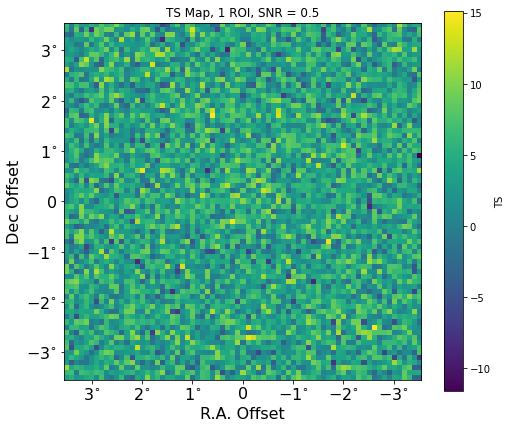

In [5]:
tsmap=np.zeros(gauss.shape)
###Calculating TS value pixel by pixel. 
for i in range(71):
    for j in range(71):
        tsmap[i,j]=-2*(np.log(1+snr)*roi[i,j]-snr*model[i,j])
        

fig5,axs5=plt.subplots(ncols=1,nrows=1,figsize=(8,7))

im=axs5.imshow(tsmap)
print(tsmap.min(),tsmap.max())
axs5.set_title('TS Map, 1 ROI, SNR = '+str(snr))
axs5.set_ylabel(r'Dec Offset',fontsize=16)
axs5.set_yticks([5,15,25,35,45,55,65])
axs5.set_yticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
axs5.set_xlabel(r'R.A. Offset',fontsize=16)
axs5.set_xticks([5,15,25,35,45,55,65])
axs5.set_xticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
fig5.colorbar(im,ax=axs5, label='TS')
#fig5.savefig('ts_1.png')

Now we reproduce the figures of 10, 20, 30, 40 and 50 stacked TS maps we saw in the talk earlier

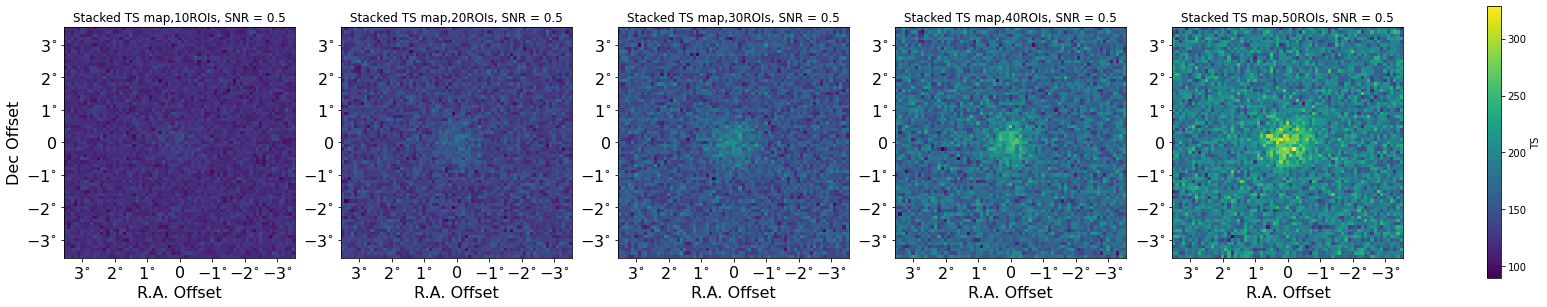

In [6]:
fig3,axs3=plt.subplots(ncols=5,nrows=1,figsize=(30,5))
newshape=list(gauss.shape)
newshape.append(5)
stacked_tsmaps=np.zeros(tuple(newshape))  ##Create a 3D array for easier storing of the 5 stacked TS maps then plotting them. 

for stack_i in range(5):
    no_of_stacks=(stack_i+1)*10
    for ijkijk in range(no_of_stacks):
        tsmap=np.zeros(gauss.shape)
        roi=np.zeros(gauss.shape)
        model=np.zeros(gauss.shape)
        for i in range(71):
            for j in range(71):
                model[i,j]=flat_field*gauss[i,j]*snr+flat_field
                roi[i,j]=np.random.poisson(flat_field)*gauss[i,j]*snr+np.random.poisson(flat_field)

        for i in range(71):
            for j in range(71):
                tsmap[i,j]=-2*(np.log(1+snr)*roi[i,j]-snr*model[i,j])
                
        stacked_tsmaps[:,:,stack_i]=stacked_tsmaps[:,:,stack_i]+tsmap
vmin=stacked_tsmaps.min()
vmax=stacked_tsmaps.max()
for i in range(len(axs3.flat)):
    ax=axs3.flat[i]
    im=ax.imshow(stacked_tsmaps[:,:,i],vmax=vmax)
    ax.set_title('Stacked TS map,'+str((i+1)*10)+'ROIs, SNR = '+str(snr))
    if i==0:
        ax.set_ylabel(r'Dec Offset',fontsize=16)
    ax.set_yticks([5,15,25,35,45,55,65])
    ax.set_yticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)
    ax.set_xlabel(r'R.A. Offset',fontsize=16)
    ax.set_xticks([5,15,25,35,45,55,65])
    ax.set_xticklabels([r'$3^{\circ}$',r'$2^{\circ}$',r'$1^{\circ}$',0,r'$-1^{\circ}$',r'$-2^{\circ}$',r'$-3^{\circ}$'],fontsize=16)

fig3.colorbar(im,ax=axs3.ravel().tolist(), label='TS')

We can also replicated the cumulative TS value increasing w/ stacked ROIs from literature as shown in the slides

In [7]:
ts_roi=np.array([]) ##TS value of the central source
print(snr)
for nroi in range(40):
    #for ijkijk in range(nroi+1):
    tsmap=np.zeros(gauss.shape)
    roi=np.zeros(gauss.shape)
    for i in range(71):
        for j in range(71):
            model[i,j]=flat_field*gauss[i,j]*snr+flat_field
            roi[i,j]=np.random.poisson(flat_field)*gauss[i,j]*snr+np.random.poisson(flat_field)

    for i in range(71):
        for j in range(71):
            #tsmap[i,j]=-2*(np.log(1+snr)*roi[i,j]-snr*model[i,j])
            tsmap[i,j]=2*((np.log(model[i,j])-np.log(flat_field))*roi[i,j]+flat_field-model[i,j])
    ts_roi=np.append(ts_roi, np.mean(tsmap[34:37,34:37])) ##TS value here, is calculated as the average of the central 9 pixels. 
#[34:37,34:37]

0.5


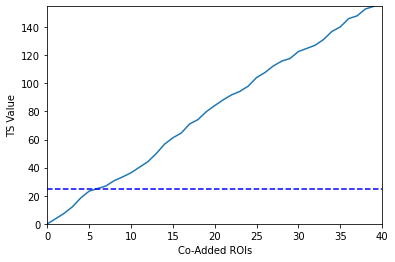

In [8]:
no_co_added=np.arange(0,40)
cumTS=np.array([])
for i in range(len(no_co_added)):
    cumTS=np.append(cumTS, np.sum(ts_roi[:i])) ##Stacking TS values
plt.plot(no_co_added, cumTS)
plt.xlabel('Co-Added ROIs')
plt.ylabel('TS Value')
plt.xlim(0,40)
plt.ylim(0,cumTS.max())
plt.axhline(25, ls='--', color='b')